<a href="https://colab.research.google.com/github/stutibimali/miniproject/blob/main/Image_classification_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION USING MACHINE LEARNING



### PREPROCESSING DATA IS DONE USING Support Vector Machine (SVM) ALGORITHM 
###DATA is fetched using kaggle
###Scikit-image Library for reading and resizing an Image is used

####PROJECT BY : Stuti Bimali
#### MINOR PROJECT
#### DS-MINOR-APRIL


In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.2 ms (started: 2021-05-23 12:52:55 +00:00)


In [2]:
#Data : Images
# 1. Download dataset from Kaggle for image classification

time: 813 µs (started: 2021-05-23 12:52:55 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 5.25 ms (started: 2021-05-23 12:52:55 +00:00)


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


time: 1.12 ms (started: 2021-05-23 12:52:55 +00:00)


In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle
time: 3.41 ms (started: 2021-05-23 12:52:55 +00:00)


In [6]:
%pwd

'/content/gdrive/My Drive/Kaggle'

time: 3.11 ms (started: 2021-05-23 12:52:55 +00:00)


In [7]:
!kaggle datasets download -d stutibimali/image-classification-by-ml

 99% 169M/170M [00:01<00:00, 94.8MB/s]
100% 170M/170M [00:01<00:00, 98.2MB/s]
time: 2.44 s (started: 2021-05-23 12:52:55 +00:00)


In [8]:
!ls

image-classification-by-ml.zip	kaggle.json
time: 121 ms (started: 2021-05-23 12:52:58 +00:00)


In [9]:
!unzip \*.zip  && rm *.zip

Archive:  image-classification-by-ml.zip
  inflating: animal/alessandro-desantis-9_9hzZVjV8s-unsplash.jpg  
  inflating: animal/charles-deluvio-Mv9hjnEUHR4-unsplash.jpg  
  inflating: animal/david-clode-DCelW4ytxfM-unsplash.jpg  
  inflating: animal/dominik-lange-BFsm5vldl2I-unsplash.jpg  
  inflating: animal/dusan-veverkolog-ZXuDkw7Be7E-unsplash.jpg  
  inflating: animal/francesco-de-tommaso-ZxNKxnR32Ng-unsplash.jpg  
  inflating: animal/frida-bredesen-c_cPNXlovvY-unsplash.jpg  
  inflating: animal/gary-bendig-6GMq7AGxNbE-unsplash.jpg  
  inflating: animal/gwen-weustink-I3C1sSXj1i8-unsplash.jpg  
  inflating: animal/jean-wimmerlin-YxDENE4HgMM-unsplash.jpg  
  inflating: animal/jonatan-pie-xgTMSz6kegE-unsplash.jpg  
  inflating: animal/juan-gaspar-de-alba-eWJqUbm-l6s-unsplash.jpg  
  inflating: animal/kelly-sikkema-r077pfFsdaU-unsplash.jpg  
  inflating: animal/kevin-mueller-aeNg4YA41P8-unsplash.jpg  
  inflating: animal/kieran-white-NKN25UfGfkQ-unsplash.jpg  
  inflating: animal/laura

In [10]:
#preprocessing
# 1. Resize
#2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR ="/content/gdrive/MyDrive/Kaggle"
CATEGORIES =['animal','flower','vehicles']

#iterating
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR,category) #create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))#Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 12min 22s (started: 2021-05-23 12:53:02 +00:00)


In [11]:
len(flat_data[0])

67500

time: 5.38 ms (started: 2021-05-23 13:05:24 +00:00)


In [12]:
150*150*3

67500

time: 4.58 ms (started: 2021-05-23 13:05:24 +00:00)


In [13]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 4.42 ms (started: 2021-05-23 13:05:24 +00:00)


<BarContainer object of 3 artists>

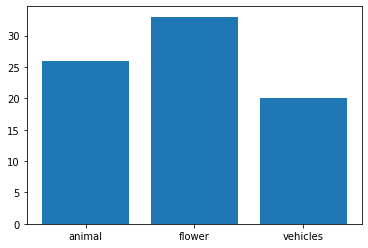

time: 157 ms (started: 2021-05-23 13:05:24 +00:00)


In [14]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [15]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 94.6 ms (started: 2021-05-23 13:05:24 +00:00)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 35s (started: 2021-05-23 13:05:24 +00:00)


In [17]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

time: 158 ms (started: 2021-05-23 13:06:59 +00:00)


In [18]:
y_test

array([1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 2])

time: 3.59 ms (started: 2021-05-23 13:07:00 +00:00)


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.29 ms (started: 2021-05-23 13:07:00 +00:00)


In [20]:
accuracy_score(y_pred,y_test)

0.5416666666666666

time: 4.3 ms (started: 2021-05-23 13:07:00 +00:00)


In [21]:
confusion_matrix(y_pred,y_test)

array([[ 1,  1,  0],
       [ 6, 12,  4],
       [ 0,  0,  0]])

time: 4.32 ms (started: 2021-05-23 13:07:00 +00:00)


In [22]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 172 ms (started: 2021-05-23 13:07:00 +00:00)


In [23]:
model = pickle.load(open('img_model.p','rb'))

time: 62.9 ms (started: 2021-05-23 13:07:00 +00:00)


Enter your urlhttps://cdn.britannica.com/45/5645-050-B9EC0205/head-treasure-flower-disk-flowers-inflorescence-ray.jpg
(663, 977, 3)
 PREDICTED OUTPUT: flower


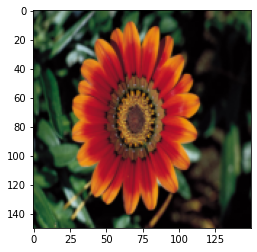

time: 1min 45s (started: 2021-05-23 13:07:00 +00:00)


In [24]:
# Testing a brand new Image
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [24]:
len(flat_data[0])

In [25]:
150*150*3

67500

time: 4.05 ms (started: 2021-05-23 13:08:46 +00:00)


In [26]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 5.05 ms (started: 2021-05-23 13:08:46 +00:00)


<BarContainer object of 3 artists>

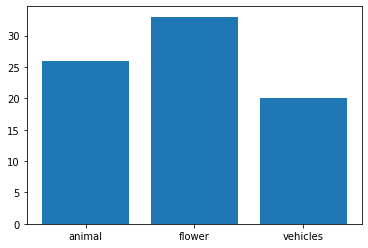

time: 157 ms (started: 2021-05-23 13:08:46 +00:00)


In [27]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [28]:
 Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://cdn.britannica.com/45/5645-050-B9EC0205/head-treasure-flower-disk-flowers-inflorescence-ray.jpg
(663, 977, 3)
 PREDICTED OUTPUT: flower


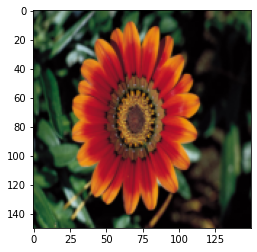

time: 4.45 s (started: 2021-05-23 13:08:53 +00:00)


In [29]:
# Testing a brand new Image
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [30]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 3.8MB/s 
     |████████████████████████████████| 4.2MB 34.4MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 174kB 39.1MB/s 
     |████████████████████████████████| 112kB 39.8MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 122kB 43.4MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=ff668fdea4972a1f2d7c0f9deb5629bba31df50e1a241d189d03372c83d28cb8
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installation

     |████████████████████████████████| 747kB 2.9MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=d28885a30a6fe9cab034f9af5728c20043be4fef4b77e1523ca786aa0f2bae90
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
time: 20.4 s (started: 2021-05-23 13:09:05 +00:00)


In [31]:
#Deployment :
# WebApp - Streamlit / dash

time: 1.03 ms (started: 2021-05-23 13:09:36 +00:00)


In [32]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle

from PIL import Image
st.title('Image Classifier using Machine Learning') 
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...",type="jpg")
if uploaded_file is not None:
  
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES =['animal','flower','vehicles']
    st.write('RESULT>>>>')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten()) 
    flat_data = np.array(flat_data)
    print(img.shape)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Writing app.py
time: 13 ms (started: 2021-05-23 13:10:56 +00:00)


In [33]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://a764b1d2ef78.ngrok.io" -> "http://localhost:80">

time: 1.68 s (started: 2021-05-23 13:11:27 +00:00)
